In [17]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [26]:

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Abhilash\Anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.14               |           py36_0         2.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.19.0               |             py_0          53 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.49-py_0
  geopy              conda-forge/noarch::geopy-1.19.0-py_0

The following packages will be UPDATED:

  conda                                        4.6.8-py36_0 --> 4.6.14-py36_0




geographiclib-1.49   | 32 KB     |         

'ONDA' is not recognized as an internal or external command,
operable program or batch file.


Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==5.0.1=py36h8316230_2
  - defaults/win-64::blaze==0.11.3=py36h8a29ca5_0
  - defaults/win-64::matplotlib==2.1.0=py36h11b4b9c_0
  - defaults/win-64::numba==0.35.0=np113py36_10
  - defaults/win-64::scikit-image==0.13.0=py36h6dffa3f_1
  - defaults/win-64::seaborn==0.8.0=py36h62cb67c_0
done

# All requested packages already installed.

Folium installed
Libraries imported.


#Load the NYC Data available to the pandas Dataframe

In [27]:
NYC_WIFI_DATA = pd.read_csv('H:/Machine Learning R/Dataset/NYC_Wi-Fi_Hotspot_Locations.csv')
NYC_WIFI_DATA.head()

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,NTAName,CounDist,Postcode,BoroCD,CT2010,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,998,MN,Free,LinkNYC - Citybridge,mn-05-123662,179 WEST 26 STREET,40.745968,-73.994039,985901.6953,211053.1306,...,Midtown-Midtown South,3,10001,105,95,1009500,0,0,1425,"New York\n(40.74596800000, -73.99403900000)"
1,999,MN,Free,LinkNYC - Citybridge,mn-05-123789,25 EAST 29 STREET,40.744614,-73.985069,988387.3095,210559.9467,...,Midtown-Midtown South,2,10016,105,74,1007400,1016929,1008590024,1426,"New York\n(40.74461400000, -73.98506900000)"
2,1000,MN,Free,LinkNYC - Citybridge,mn-05-133354,1515 BROADWAY,40.757666,-73.985878,988162.2564,215315.0213,...,Midtown-Midtown South,3,10036,105,119,1011900,1024714,1010160036,1427,"New York\n(40.75766600000, -73.98587800000)"
3,1001,MN,Free,LinkNYC - Citybridge,mn-05-133359,201 WEST 48 STREET,40.759971,-73.984342,988587.7576,216155.0334,...,Midtown-Midtown South,4,10036,105,125,1012500,1076195,1010200046,1428,"New York\n(40.75997100000, -73.98434200000)"
4,1002,MN,Free,LinkNYC - Citybridge,mn-05-133361,1600 Broadway,40.760413,-73.984541,988532.6554,216316.0369,...,Midtown-Midtown South,4,10019,105,125,1012500,1087187,1010207502,1429,"New York\n(40.76041300000, -73.98454100000)"


#Exploratory Data Analysis

In [28]:
NYC_WIFI_DATA['Borough'].value_counts()

MN    1204
BK     595
QU     415
BX     257
SI      95
Name: Borough, dtype: int64

In [29]:
NYC_WIFI_DATA['Provider'].value_counts()

LinkNYC - Citybridge       1134
SPECTRUM                    343
Transit Wireless            276
ALTICEUSA                   237
Harlem                      128
Downtown Brooklyn           100
NYPL                         90
QPL                          65
BPL                          59
Manhattan Down Alliance      36
Chelsea                      30
NYCHA                        28
AT&T                         27
City Tech                    11
Partner                       2
Name: Provider, dtype: int64

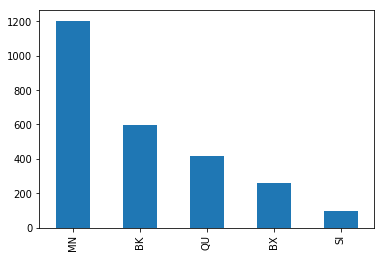

In [30]:
NYC_WIFI_DATA['Borough'].value_counts().plot.bar()

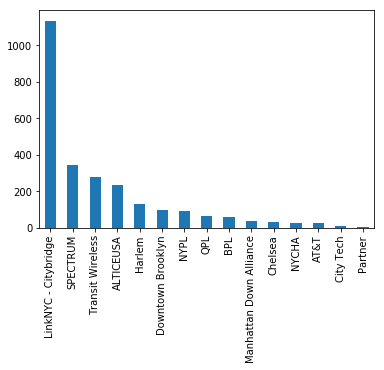

In [31]:
NYC_WIFI_DATA['Provider'].value_counts().plot.bar()

In [32]:
import folium
display = folium.Map(location=[40.75, -74])

for (_, (lat, long)) in NYC_WIFI_DATA[['Latitude', 'Longitude']].iterrows():
    folium.CircleMarker([lat, long],
                    radius=5,
                    color='#3186cc',
                    fill_color='#3186cc',
                   ).add_to(display)

display

#Load foursquare API Credential

In [33]:
CLIENT_ID = 'I3SHOKA1QOFMNBFXLTQGF2NPXACDFCNKM02ZVPUIYDFOSGZN' # your Foursquare ID
CLIENT_SECRET = 'QLTFCCP00O4HFBMW3KKUWQHP2DA3JCZ3THKV42PHZDSREIB4' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: I3SHOKA1QOFMNBFXLTQGF2NPXACDFCNKM02ZVPUIYDFOSGZN
CLIENT_SECRET:QLTFCCP00O4HFBMW3KKUWQHP2DA3JCZ3THKV42PHZDSREIB4


In [34]:

address = 'New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7127281 -74.0060152


In [51]:
search_query = 'PUBLIC WIFI'
radius = 500
print(search_query + ' .... OK!')

PUBLIC WIFI .... OK!


In [52]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=I3SHOKA1QOFMNBFXLTQGF2NPXACDFCNKM02ZVPUIYDFOSGZN&client_secret=QLTFCCP00O4HFBMW3KKUWQHP2DA3JCZ3THKV42PHZDSREIB4&ll=40.7127281,-74.0060152&v=20180604&query=PUBLIC WIFI&radius=500&limit=30'

In [53]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cd7bbd59fb6b7571a9a69a4'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d124941735',
      'name': 'Office',
      'pluralName': 'Offices',
      'primary': True,
      'shortName': 'Office'}],
    'hasPerk': False,
    'id': '51a75cf3498ec9d81dba70b0',
    'location': {'address': '1 Centre St',
     'cc': 'US',
     'city': 'New York',
     'country': 'United States',
     'distance': 8,
     'formattedAddress': ['1 Centre St',
      'New York, NY 10007',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.712785672206365,
       'lng': -74.00594379881144}],
     'lat': 40.712785672206365,
     'lng': -74.00594379881144,
     'postalCode': '10007',
     'state': 'NY'},
    'name': 'The Office of the Public Advocate for the City of New York',
    'referralId': 'v-1557642197'},
   {'catego

In [54]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,51a75cf3498ec9d81dba70b0,1 Centre St,US,New York,United States,NaN,8,"[1 Centre St, New York, NY 10007, United States]","[{'label': 'display', 'lat': 40.71278567220636...",40.712786,-74.005944,10007,NY,The Office of the Public Advocate for the City...,v-1557642197,NaN
1,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,58ae412372714f32e282e2d7,9 Barclay Street,US,New York,United States,Broadway,208,"[9 Barclay Street (Broadway), New York, NY 100...","[{'label': 'display', 'lat': 40.71209863552467...",40.712099,-74.008345,10007,NY,The Wooly Public,v-1557642197,NaN
2,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",False,4be44cfacf200f47edc0113c,78 W 168th St,US,Bronx,United States,at Woodycrest Ave.,179,"[78 W 168th St (at Woodycrest Ave.), Bronx, NY...","[{'label': 'display', 'lat': 40.71433672100432...",40.714337,-74.005984,10452,NY,New York Public Library - High Bridge,v-1557642197,NaN
3,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",False,4aef2186f964a520e0d521e3,9 Murray St,US,New York,United States,btwn Broadway & Church St,183,"[9 Murray St (btwn Broadway & Church St), New ...","[{'label': 'display', 'lat': 40.71352075245083...",40.713521,-74.007924,10007,NY,New York Public Library - New Amsterdam,v-1557642197,NaN
4,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,4b82ba62f964a520d0e030e3,33 Maiden Ln,US,New York,United States,NaN,510,"[33 Maiden Ln, New York, NY 10038, United States]","[{'label': 'display', 'lat': 40.70864403316877...",40.708644,-74.008770,10038,NY,PRSA - Public Relations Society of America,v-1557642197,NaN


In [55]:

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,The Office of the Public Advocate for the City...,Office,1 Centre St,US,New York,United States,NaN,8,"[1 Centre St, New York, NY 10007, United States]","[{'label': 'display', 'lat': 40.71278567220636...",40.712786,-74.005944,10007,NY,51a75cf3498ec9d81dba70b0
1,The Wooly Public,Restaurant,9 Barclay Street,US,New York,United States,Broadway,208,"[9 Barclay Street (Broadway), New York, NY 100...","[{'label': 'display', 'lat': 40.71209863552467...",40.712099,-74.008345,10007,NY,58ae412372714f32e282e2d7
2,New York Public Library - High Bridge,Library,78 W 168th St,US,Bronx,United States,at Woodycrest Ave.,179,"[78 W 168th St (at Woodycrest Ave.), Bronx, NY...","[{'label': 'display', 'lat': 40.71433672100432...",40.714337,-74.005984,10452,NY,4be44cfacf200f47edc0113c
3,New York Public Library - New Amsterdam,Library,9 Murray St,US,New York,United States,btwn Broadway & Church St,183,"[9 Murray St (btwn Broadway & Church St), New ...","[{'label': 'display', 'lat': 40.71352075245083...",40.713521,-74.007924,10007,NY,4aef2186f964a520e0d521e3
4,PRSA - Public Relations Society of America,Building,33 Maiden Ln,US,New York,United States,NaN,510,"[33 Maiden Ln, New York, NY 10038, United States]","[{'label': 'display', 'lat': 40.70864403316877...",40.708644,-74.008770,10038,NY,4b82ba62f964a520d0e030e3
5,NYC Public Service Corps,Government Building,1 Centre St,US,New York,United States,NaN,236,"[1 Centre St, New York, NY 10007, United States]","[{'label': 'display', 'lat': 40.71233771575447...",40.712338,-74.003264,10007,NY,55ddd61b498e111556837561
6,New York State Public Service Commission,Government Building,90 Church St,US,New York,United States,NaN,330,"[90 Church St, New York, NY 10007, United States]","[{'label': 'display', 'lat': 40.71253320962044...",40.712533,-74.009921,10007,NY,4f9ad265e4b087d95c393909
7,Office Of The Public Advocate,Government Building,1 Centre St Fl 15,US,New York,United States,Chambers Street,249,"[1 Centre St Fl 15 (Chambers Street), New York...","[{'label': 'display', 'lat': 40.71401811282996...",40.714018,-74.003602,10007,NY,4d6e79df29586dcb9bbab3f1
8,Superior Certified Public Accountant & Managem...,Lawyer,100 Church St Fl 8,US,New York,United States,NaN,352,"[100 Church St Fl 8, New York, NY 10007, Unite...",NaN,40.713290,-74.010130,10007,NY,59fc9b7a1987ec0bcb902630
9,NYC - Office Of Public Advocate,Government Building,1 Centre St,US,New York,United States,NaN,380,"[1 Centre St, New York, NY 10007, United States]","[{'label': 'display', 'lat': 40.71614, 'lng': ...",40.716140,-74.005702,10007,NY,4d5a9e28f8ff236a000bd84a


In [70]:
newyorkdf=pd.DataFrame(NYC_WIFI_DATA[['Latitude', 'Longitude']])
newyorkdf.head()

,Latitude,Longitude
0,40.745968,-73.994039
1,40.744614,-73.985069
2,40.757666,-73.985878
3,40.759971,-73.984342
4,40.760413,-73.984541


In [61]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='New York',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(NYC_WIFI_DATA[['Latitude', 'Longitude']].values)
labels = kmeans.labels_

colors = ['#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd']
display = folium.Map(location=[40.75, -74])

for (lat, long, label) in zip(NYC_WIFI_DATA['Latitude'], NYC_WIFI_DATA['Longitude'], labels):
    folium.CircleMarker([lat, long],
                    radius=5,
                    color=colors[label],
                    fill_color=colors[label],
                   ).add_to(display)
    
display